<a href="https://colab.research.google.com/github/leksangpelkey/Kaggle/blob/main/Kagglemoviedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I am going to analysis my data on basis of following question:**

How many years does this data set covers?	
	
What are the Top 10 Highest Rated Movies?	
	
What are the Top 10 popular movies?	
	
What are the Top 10 highest voted Movies?	
	
Which movie has least rating and which year was it released?	
	
Decade wise Movies Released and Top rated movies of Decade	
	
Which Month Highest Movies were released	
	
Which Year has the maximum movies released	
	
Name all the movies that were realeased between 2015 and 2020, have a ratings above 8.0 but made below the 25th percentile in popularity	
	
On which day most of movies were released between 2015 and 2020?	
	
Latest year (2021) on which day, month most of movies were released, Highest rated and Popularity And maximum and minimum Votes	


# **Importing Libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

# **Loading dataframe**

In [6]:
 url = 'https://raw.githubusercontent.com/leksangpelkey/capstone/main/Movie-Dataset-Latest.csv?token=GHSAT0AAAAAABPWOJWNZLBMDEPCHLVOY63MYPHOL4Q'

In [7]:
df = pd.read_csv(url, index_col=0)

In [8]:
df.shape

(9463, 8)

In [9]:
df.head()

,id,title,release_date,overview,popularity,vote_average,vote_count,video
0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False
1,278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False
2,238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False
3,724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False
4,424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False


**Changing the Index**

In [10]:
df['id'].is_unique

True

In [11]:
df= df.set_index('id')


In [12]:
df.head()

,title,release_date,overview,popularity,vote_average,vote_count,video
id,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False


In [13]:
df.tail()

,title,release_date,overview,popularity,vote_average,vote_count,video
id,,,,,,,
13805,Disaster Movie,2008-08-29,"The filmmaking team behind the hits ""Scary Mov...",12.121,3.2,787,False
5491,Battlefield Earth,2000-05-12,"In the year 3000, man is no match for the Psyc...",10.200,3.2,628,False
11059,House of the Dead,2003-04-11,"Set on an island off the coast, a techno rave ...",8.120,3.2,281,False
14164,Dragonball Evolution,2009-03-12,The young warrior Son Goku sets out on a quest...,52.129,2.8,1584,False
40016,Birdemic: Shock and Terror,2010-02-27,A platoon of eagles and vultures attacks the r...,7.341,2.2,237,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 19404 to 40016
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9463 non-null   object 
 1   release_date  9463 non-null   object 
 2   overview      9449 non-null   object 
 3   popularity    9463 non-null   float64
 4   vote_average  9463 non-null   float64
 5   vote_count    9463 non-null   int64  
 6   video         9463 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 526.7+ KB


In [15]:
df.columns

Index(['title', 'release_date', 'overview', 'popularity', 'vote_average',
       'vote_count', 'video'],
      dtype='object')

# **Augment data with additional columns**

In [16]:
df['release_date']=pd.to_datetime(df['release_date'])

Creating a Year column after coverting the release_date(object) to datetime format

In [17]:
df['Year'] = df['release_date'].dt.year

Creating a Month column 

In [18]:
df['Month'] = df['release_date'].dt.month

Creating a Day Column

In [19]:
df['day'] = df['release_date'].dt.day_name()

In [20]:
df.shape

(9463, 10)

In [21]:
df.head()

,title,release_date,overview,popularity,vote_average,vote_count,video,Year,Month,day
id,,,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995,10,Friday
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994,9,Friday
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972,3,Tuesday
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020,7,Friday
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993,11,Tuesday


# **Renaming columns**

In [22]:
new_df = df.rename(columns={'title':'Movie', 'release_date': 'Release','popularity':'Popularity', 'vote_average':'Rating','vote_count': 'Votes'})
new_df

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day
id,,,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995,10,Friday
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994,9,Friday
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972,3,Tuesday
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020,7,Friday
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993,11,Tuesday
...,...,...,...,...,...,...,...,...,...,...
13805,Disaster Movie,2008-08-29,"The filmmaking team behind the hits ""Scary Mov...",12.121,3.2,787,False,2008,8,Friday
5491,Battlefield Earth,2000-05-12,"In the year 3000, man is no match for the Psyc...",10.200,3.2,628,False,2000,5,Friday
11059,House of the Dead,2003-04-11,"Set on an island off the coast, a techno rave ...",8.120,3.2,281,False,2003,4,Friday


**Renaming the month**

In [23]:
new_df['Month'].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}, inplace=True)

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 19404 to 40016
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Movie       9463 non-null   object        
 1   Release     9463 non-null   datetime64[ns]
 2   overview    9449 non-null   object        
 3   Popularity  9463 non-null   float64       
 4   Rating      9463 non-null   float64       
 5   Votes       9463 non-null   int64         
 6   video       9463 non-null   bool          
 7   Year        9463 non-null   int64         
 8   Month       9463 non-null   object        
 9   day         9463 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 748.5+ KB


# **How many years does this data set covers?**

In [25]:
new_df['Year'].sort_values(ascending=False)

id
471498    2021
736074    2021
808023    2021
566525    2021
730840    2021
          ... 
36208     1918
3059      1916
618       1915
5698      1903
775       1902
Name: Year, Length: 9463, dtype: int64

From Year 1902 to 2021

# **What are the Top 10 Highest Rated Movies?**

In [26]:
new_df['Rating'].unique()

array([8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.9, 7.8, 7.7, 7.6, 7.5,
       7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7, 6.6, 6.5, 6.4, 6.3, 6.2,
       6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5. , 4.9,
       4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.7, 3.3, 3.2,
       2.8, 2.2])

In [27]:
new_df['Rating'].mean()

6.596829758004844

In [28]:
Top_ratings = new_df[new_df['Rating']>=8.6].head(10)
Top_ratings

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day
id,,,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995,October,Friday
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994,September,Friday
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972,March,Tuesday
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020,July,Friday
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993,November,Tuesday
696374,Gabriel's Inferno,2020-05-29,An intriguing and sinful exploration of seduct...,18.395,8.6,2172,False,2020,May,Friday
761053,Gabriel's Inferno Part III,2020-11-19,The final part of the film adaption of the ero...,29.495,8.6,922,False,2020,November,Thursday
240,The Godfather: Part II,1974-12-20,In the continuing saga of the Corleone crime f...,43.065,8.6,9164,False,1974,December,Friday
283566,Evangelion: 3.0+1.0 Thrice Upon a Time,2021-03-08,"In the aftermath of the Fourth Impact, strande...",211.871,8.6,405,False,2021,March,Monday


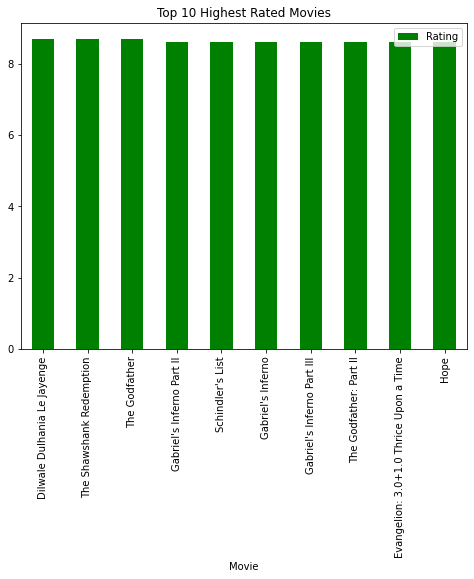

In [29]:
Top_ratings.plot.bar(x='Movie', y='Rating', color='green', rot=0, figsize=(8, 6))
plt.title('Top 10 Highest Rated Movies')
plt.xticks(rotation = 'vertical')
plt.savefig('topratedmovies.png')

# **What are the Top 10 popular movies?** 

In [30]:
Popular_movies = new_df[['Movie', 'Popularity', 'Year']]
Popular_movies = Popular_movies.sort_values('Popularity',ascending= False).head(10)
Popular_movies

,Movie,Popularity,Year
id,,,
634649,Spider-Man: No Way Home,14136.690,2021
568124,Encanto,8663.277,2021
624860,The Matrix Resurrections,7976.130,2021
580489,Venom: Let There Be Carnage,7537.265,2021
460458,Resident Evil: Welcome to Raccoon City,4973.769,2021
512195,Red Notice,3644.595,2021
566525,Shang-Chi and the Legend of the Ten Rings,2967.672,2021
1930,The Amazing Spider-Man,2514.446,2012
315635,Spider-Man: Homecoming,2474.781,2017


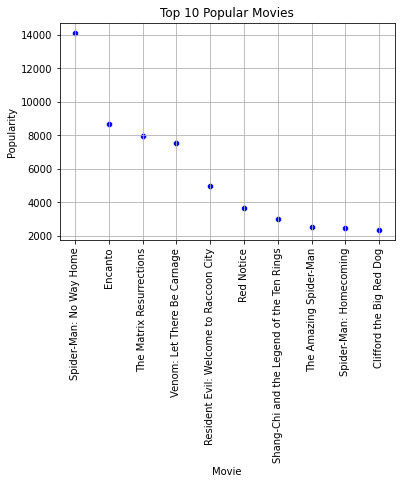

In [31]:
sns.scatterplot(data=Popular_movies, x='Movie', y='Popularity',  color="blue")
plt.grid()
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Popular Movies')
plt.savefig('Popularmoviereleased.png')

# **What are the Top 10 highest voted Movies?**

In [32]:
Highest_voted = new_df[['Movie','Votes', 'Year']]
Highest_voted = Highest_voted.sort_values('Votes', ascending = False).head(10)
Highest_voted 

,Movie,Votes,Year
id,,,
27205,Inception,30535,2010
157336,Interstellar,27360,2014
155,The Dark Knight,26452,2008
293660,Deadpool,25985,2016
24428,The Avengers,25978,2012
19995,Avatar,24550,2009
118340,Guardians of the Galaxy,23599,2014
299536,Avengers: Infinity War,23429,2018
550,Fight Club,23090,1999


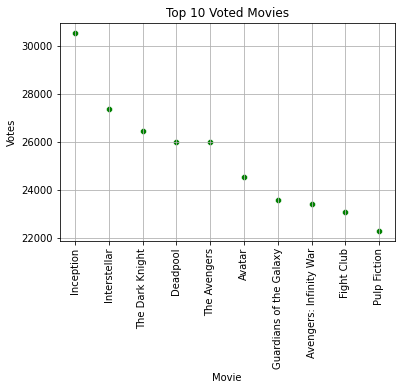

In [33]:
sns.scatterplot(data=Highest_voted, x='Movie', y='Votes',  color="green")
plt.grid()
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Voted Movies')
plt.savefig('Highestvotedmovies.png')

# **Which movie has least rating and which year was it released?**

In [34]:
 Least_rated_movies =new_df[['Movie','Rating','Year']]

In [78]:
 Least_rated_movies.sort_values('Rating', ascending = True ).head(10)

,Movie,Rating,Year
id,,,
40016,Birdemic: Shock and Terror,2.2,2010
14164,Dragonball Evolution,2.8,2009
5491,Battlefield Earth,3.2,2000
13805,Disaster Movie,3.2,2008
12142,Alone in the Dark,3.2,2005
11059,House of the Dead,3.2,2003
74849,The Star Wars Holiday Special,3.3,1978
485774,The Open House,3.7,2018
35885,Amore 14,3.7,2009


In [36]:
new_df[new_df['Rating']<=3.3].head(10)

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day
id,,,,,,,,,,
74849,The Star Wars Holiday Special,1978-12-01,Luke Skywalker and Han Solo battle evil Imperi...,14.081,3.3,337,False,1978,December,Friday
12142,Alone in the Dark,2005-01-28,Edward Carnby is a private investigator specia...,12.199,3.2,434,False,2005,January,Friday
13805,Disaster Movie,2008-08-29,"The filmmaking team behind the hits ""Scary Mov...",12.121,3.2,787,False,2008,August,Friday
5491,Battlefield Earth,2000-05-12,"In the year 3000, man is no match for the Psyc...",10.200,3.2,628,False,2000,May,Friday
11059,House of the Dead,2003-04-11,"Set on an island off the coast, a techno rave ...",8.120,3.2,281,False,2003,April,Friday
14164,Dragonball Evolution,2009-03-12,The young warrior Son Goku sets out on a quest...,52.129,2.8,1584,False,2009,March,Thursday
40016,Birdemic: Shock and Terror,2010-02-27,A platoon of eagles and vultures attacks the r...,7.341,2.2,237,False,2010,February,Saturday


# **Applying Functions**

In [37]:
def rating_function(x):
  if x>7:
    return "good"
  elif (x>=6) and (x<=7):
    return "average"
  else:  
      return "bad"


The .apply() method passes every value in the rating column through the rating_function and then returns a new Series is then assigned to a new column called rating_ctaegory.

In [38]:
new_df['Rating_category']= new_df['Rating'].apply(rating_function)
new_df.head()

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category
id,,,,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995,October,Friday,good
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994,September,Friday,good
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972,March,Tuesday,good
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020,July,Friday,good
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993,November,Tuesday,good


**How many movies has received good ratings?**

In [39]:
good_rating = new_df.loc[new_df.Rating_category=='good'].count()[0]
good_rating

2922

**How many movies has received average ratings?**

In [40]:
average_rating = new_df.loc[new_df.Rating_category=='average'].count()[0]
average_rating

4539

**How many movies has received bad ratings?**

In [41]:
bad_rating = new_df.loc[new_df.Rating_category=='bad'].count()[0]
bad_rating

2002

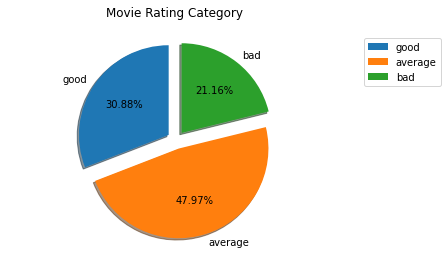

In [42]:
ratings = [2922,4539,2002]
labels = ['good','average','bad']
plt.pie(ratings, labels= labels, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1),autopct='%1.2f%%')
plt.axis('equal')
plt.title('Movie Rating Category', y=1.05)
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')
plt.figsize=(8,8)
plt.savefig('movieratings.png')


otherways to find percentage

**What is percentage of goods rating movies overall**





In [43]:
(2922/9463)*100

30.87815703265349

In [44]:
new_df.describe()

,Popularity,Rating,Votes,Year
count,9463.000000,9463.000000,9463.000000,9463.000000
mean,35.678181,6.596830,1515.020712,2003.162845
std,233.491372,0.819408,2555.328387,16.831611
min,0.600000,2.200000,200.000000,1902.000000
25%,8.835000,6.100000,316.000000,1997.000000
50%,12.636000,6.600000,584.000000,2008.000000
75%,24.371000,7.200000,1434.500000,2015.000000
max,14136.690000,8.700000,30535.000000,2021.000000


# **Decade wise Movies Released and Top rated movies of Decade**

In [45]:
new_df['Decade']=new_df['Year'].astype(int)//10*10

In [46]:
new_df.head()

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category,Decade
id,,,,,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995,October,Friday,good,1990
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994,September,Friday,good,1990
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972,March,Tuesday,good,1970
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020,July,Friday,good,2020
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993,November,Tuesday,good,1990


In [47]:
decade_df = new_df.groupby(new_df['Decade']).count()
decade_df

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category
Decade,,,,,,,,,,,
1900,2,2,2,2,2,2,2,2,2,2,2
1910,3,3,3,3,3,3,3,3,3,3,3
1920,20,20,20,20,20,20,20,20,20,20,20
1930,41,41,41,41,41,41,41,41,41,41,41
1940,87,87,87,87,87,87,87,87,87,87,87
1950,147,147,147,147,147,147,147,147,147,147,147
1960,236,236,236,236,236,236,236,236,236,236,236
1970,336,336,336,336,336,336,336,336,336,336,336
1980,691,691,690,691,691,691,691,691,691,691,691


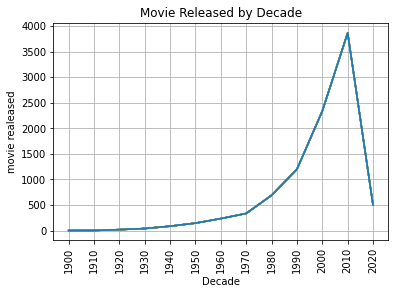

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(decade_df)
x= 1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
plt.title('Movie Released by Decade')
plt.xlabel('Decade')
plt.ylabel('movie realeased')
plt.xticks(x, rotation = 'vertical')
plt.grid()
plt.show()
plt.savefig('Moviesreleasedbydecade.png')

**What are top rated movies of decade?**

In [49]:
top_rate_by_decade = (new_df
                     .groupby(["Decade", "Movie"])
                     .mean()
                     .sort_values(["Decade", "Rating"],
                                                ascending=False)
                     .groupby(level=0, as_index=False)
                     .apply(lambda x: x.head(1) if len(x) >= 5 else x.head(1))
                     .reset_index(level=0, drop=True)
                    )

top_rate_by_decade

,,Popularity,Rating,Votes,video,Year
Decade,Movie,,,,,
1900,A Trip to the Moon,9.151,8.0,1242.0,False,1902.0
1910,A Dog's Life,5.919,7.4,216.0,False,1918.0
1920,Metropolis,14.167,8.2,1930.0,False,1927.0
1930,City Lights,11.731,8.3,1535.0,False,1931.0
1940,The Great Dictator,12.294,8.4,2462.0,False,1940.0
1950,12 Angry Men,24.240,8.5,6042.0,False,1957.0
1960,"The Good, the Bad and the Ugly",31.101,8.5,6317.0,False,1966.0
1970,The Godfather,62.784,8.7,15219.0,False,1972.0
1980,Cinema Paradiso,14.411,8.5,3161.0,False,1988.0


# **Monthly Movies Released** 

In [50]:
cats = ['January', 'February', 'March','April','May', 'June', 'July', 'August', 'September','October', 'November', 'December']
new_df['Month']=pd.Categorical(new_df['Month'], categories=cats, ordered=True)
new_df.groupby(new_df['Month']).count().sort_values('Month')

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,day,Rating_category,Decade
Month,,,,,,,,,,,
January,602,602,601,602,602,602,602,602,602,602,602
February,699,699,698,699,699,699,699,699,699,699,699
March,772,772,770,772,772,772,772,772,772,772,772
April,664,664,662,664,664,664,664,664,664,664,664
May,659,659,658,659,659,659,659,659,659,659,659
June,754,754,754,754,754,754,754,754,754,754,754
July,711,711,711,711,711,711,711,711,711,711,711
August,830,830,830,830,830,830,830,830,830,830,830
September,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071


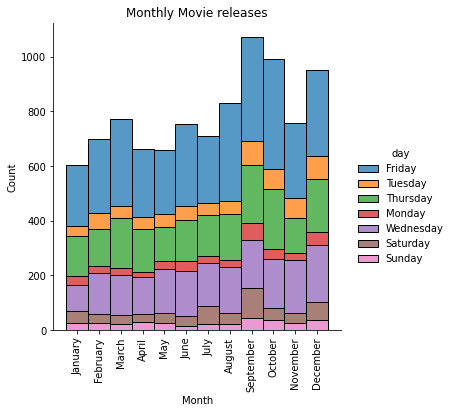

In [51]:
sns.displot(data=new_df, x='Month', hue = 'day', multiple = 'stack', bins=12, color="green")
plt.xticks(rotation = 'vertical')
plt.title('Monthly Movie releases')
plt.savefig('Monthmoviereleased.png')

# **Which Year has the maximum movies released?**

In [52]:
 new_df.groupby(new_df['Year']).size().sort_values(ascending=False)

Year
2017    454
2018    439
2016    428
2014    422
2019    395
       ... 
1918      1
1916      1
1915      1
1903      1
1902      1
Length: 107, dtype: int64


What is the mean rating of movies released in 2017

In [53]:
max_movies = new_df[new_df['Year']==2017]

In [54]:
max_movies['Rating'].mean()

6.431057268722471

Which movies has got the highest ratings in 2017?

In [55]:
Top_ratings_2017 = new_df[
       ((new_df['Year']==2017))
        &(new_df['Rating']>8.0)
        ]

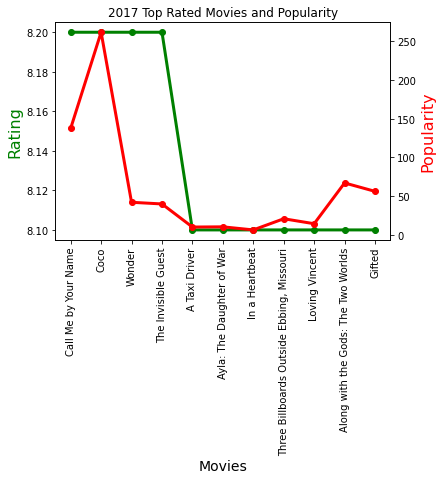

In [56]:
col1='green'
col2 = 'red'
fig,ax = plt.subplots()
ax.plot(Top_ratings_2017.Movie, Top_ratings_2017.Rating,color = col1, marker='o', linewidth =3)
ax.set_xlabel('Movies', fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.title('2017 Top Rated Movies and Popularity')
ax.set_ylabel('Rating', color=col1, fontsize =16)
ax2 = ax.twinx()

ax2.plot(Top_ratings_2017.Movie, Top_ratings_2017.Popularity, color=col2, marker='o',linewidth =3)
ax2.set_ylabel('Popularity', color=col2, fontsize=16)

plt.savefig('2017topratingmoviesandpopularity.png')

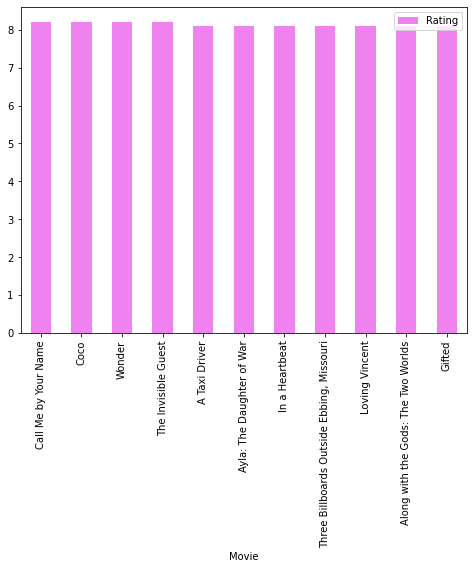

In [57]:
Top_ratings_2017.plot.bar(x='Movie', y='Rating', color='violet', rot=0, figsize=(8, 6))
plt.xticks(rotation = 'vertical')
plt.savefig('2017topratingmovies.png')

Which movies has got the least ratings in 2017?

In [58]:
Least_ratings_2017 = new_df[
       ((new_df['Year']==2017))
       &(new_df['Rating']<=4.8)
       ]

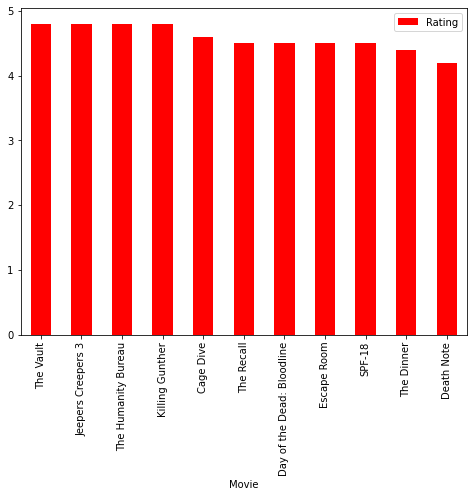

In [59]:
Least_ratings_2017.plot.bar(x='Movie', y='Rating', color='Red', rot=0, figsize=(8, 6))
plt.xticks(rotation = 'vertical')
plt.savefig('2017leastratingmovies.png')

# **Name all the movies that were realeased between 2015 and 2020, have a ratings above 8.0 but made below the 25th percentile in popularity**

In [60]:
 new_df[
       ((new_df['Year']>=2015)&(new_df['Year']<=2020))
        &(new_df['Rating']>8.0)
        &(new_df['Popularity']<new_df['Popularity'].quantile(0.25))
       ]

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category,Decade
id,,,,,,,,,,,,
640344,Me contro Te: Il film - La vendetta del Signor S,2020-01-17,A new adventure for Luì and Sofi (Me contro Te...,4.699,8.4,426,False,2020,January,Friday,good,2020
620683,My Mom is a Character 3,2019-12-26,Dona Hermínia will have to rediscover and rein...,5.239,8.3,400,False,2019,December,Thursday,good,2010
400608,Bo Burnham: Make Happy,2016-06-03,Combining his trademark wit and self-deprecati...,8.278,8.2,253,False,2016,June,Friday,good,2010
529531,Hannah Gadsby: Nanette,2018-06-19,The Australian comedian Hannah Gadsby is takin...,8.306,8.2,215,False,2018,June,Tuesday,good,2010
455661,In a Heartbeat,2017-06-01,A closeted boy runs the risk of being outed by...,6.593,8.1,883,False,2017,June,Thursday,good,2010
538362,On My Skin,2018-09-12,The incredible true story behind the most cont...,8.671,8.1,1674,False,2018,September,Wednesday,good,2010
574074,Kitbull,2019-01-18,An unlikely connection sparks between two crea...,6.845,8.1,240,False,2019,January,Friday,good,2010
406785,Inner Workings,2016-11-23,This is the story of the internal struggle bet...,7.955,8.1,207,False,2016,November,Wednesday,good,2010


# **On which day most of movies were released between 2015 and 2020?**

In [61]:
df2015_2020 = new_df[
                     ((new_df['Year']>=2015)&(new_df['Year']<=2020))
]

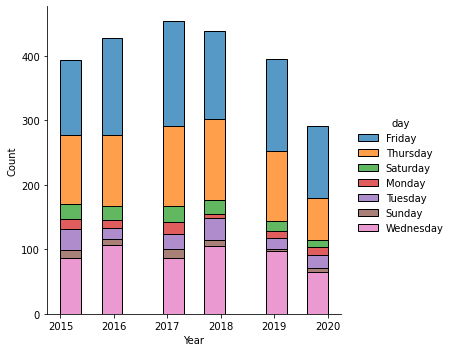

In [62]:
sns.displot(data=df2015_2020, x='Year', hue="day", multiple="stack")
plt.savefig('moviereleaseddays.png')

# **Latest year (2021)** 

In [63]:
df_2021 = new_df[new_df['Year']==2021]
df_2021

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category,Decade
id,,,,,,,,,,,,
283566,Evangelion: 3.0+1.0 Thrice Upon a Time,2021-03-08,"In the aftermath of the Fourth Impact, strande...",211.871,8.6,405,False,2021,March,Monday,good,2020
634649,Spider-Man: No Way Home,2021-12-15,Peter Parker is unmasked and no longer able to...,14136.690,8.5,2654,False,2021,December,Wednesday,good,2020
791373,Zack Snyder's Justice League,2021-03-18,Determined to ensure Superman's ultimate sacri...,548.122,8.4,7014,False,2021,March,Thursday,good,2020
482321,Ron's Gone Wrong,2021-10-15,"In a world where walking, talking, digitally c...",1255.167,8.3,511,False,2021,October,Friday,good,2020
663558,New Gods: Nezha Reborn,2021-02-06,3000 years after the boy-god Nezha conquers th...,115.621,8.3,242,False,2021,February,Saturday,good,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
534072,Great White,2021-05-13,"A sea plane is destroyed in a freak accident, ...",20.190,5.5,230,False,2021,May,Thursday,bad,2020
763164,Apex,2021-11-12,Ex-cop Thomas Malone is serving a life sentenc...,806.123,5.5,310,False,2021,November,Friday,bad,2020
654974,Home Sweet Home Alone,2021-11-12,After being left at home by himself for the ho...,550.993,5.3,293,False,2021,November,Friday,bad,2020


**Top 10 Highest rated Movies and Popularity in Year 2021**

In [64]:
Top_ratings_2021 = df_2021[df_2021['Rating']>8.0].head(10)
Top_ratings_2021

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category,Decade
id,,,,,,,,,,,,
283566,Evangelion: 3.0+1.0 Thrice Upon a Time,2021-03-08,"In the aftermath of the Fourth Impact, strande...",211.871,8.6,405,False,2021,March,Monday,good,2020
634649,Spider-Man: No Way Home,2021-12-15,Peter Parker is unmasked and no longer able to...,14136.690,8.5,2654,False,2021,December,Wednesday,good,2020
791373,Zack Snyder's Justice League,2021-03-18,Determined to ensure Superman's ultimate sacri...,548.122,8.4,7014,False,2021,March,Thursday,good,2020
482321,Ron's Gone Wrong,2021-10-15,"In a world where walking, talking, digitally c...",1255.167,8.3,511,False,2021,October,Friday,good,2020
663558,New Gods: Nezha Reborn,2021-02-06,3000 years after the boy-god Nezha conquers th...,115.621,8.3,242,False,2021,February,Saturday,good,2020
615457,Nobody,2021-03-18,"Hutch Mansell, a suburban dad, overlooked husb...",263.715,8.3,3821,False,2021,March,Thursday,good,2020
776503,CODA,2021-08-11,"As a CODA (Child of Deaf Adults), Ruby is the ...",60.906,8.3,322,False,2021,August,Wednesday,good,2020
843906,Straight Outta Nowhere: Scooby-Doo! Meets Cour...,2021-09-14,"With Mystery, Inc. on the tail of a strange ob...",245.082,8.3,248,False,2021,September,Tuesday,good,2020
337404,Cruella,2021-05-26,In 1970s London amidst the punk rock revolutio...,578.469,8.2,6204,False,2021,May,Wednesday,good,2020


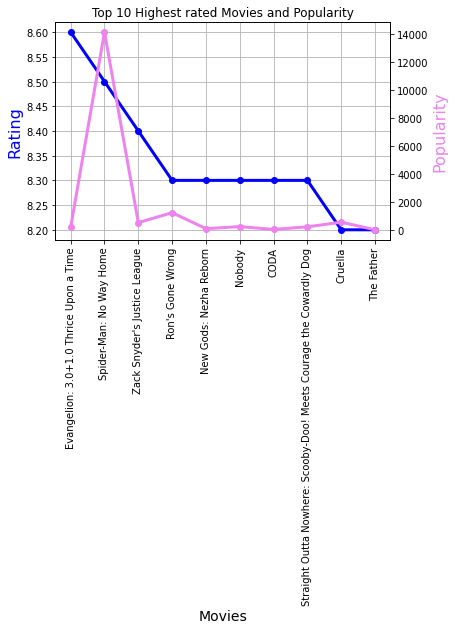

In [65]:
col1='blue'
col2 = 'violet'
fig,ax = plt.subplots()
ax.plot(Top_ratings_2021.Movie, Top_ratings_2021.Rating,color = col1, marker='o', linewidth =3)
ax.set_xlabel('Movies', fontsize = 14)
plt.title('Top 10 Highest rated Movies and Popularity')
plt.xticks(rotation = 'vertical')
plt.grid()
ax.set_ylabel('Rating', color=col1, fontsize =16)
ax2 = ax.twinx()

ax2.plot(Top_ratings_2021.Movie, Top_ratings_2021.Popularity, color=col2, marker='o',linewidth =3)
ax2.set_ylabel('Popularity', color=col2, fontsize=16)

plt.savefig('2021topratingmoviesandpopularity.png')

**Which Month has highest Releases of Movie in 2021?**

In [66]:
df_2021.groupby(df_2021['Month']).count()

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,day,Rating_category,Decade
Month,,,,,,,,,,,
January,15,15,15,15,15,15,15,15,15,15,15
February,22,22,22,22,22,22,22,22,22,22,22
March,19,19,19,19,19,19,19,19,19,19,19
April,15,15,15,15,15,15,15,15,15,15,15
May,13,13,13,13,13,13,13,13,13,13,13
June,15,15,15,15,15,15,15,15,15,15,15
July,34,34,34,34,34,34,34,34,34,34,34
August,19,19,19,19,19,19,19,19,19,19,19
September,20,20,20,20,20,20,20,20,20,20,20


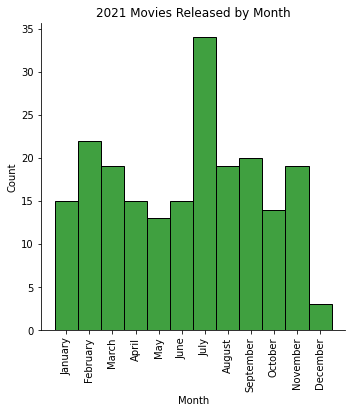

In [67]:
sns.displot(data=df_2021, x='Month',  bins=12, color ='green')
plt.xticks(rotation = 'vertical')
plt.title('2021 Movies Released by Month')
plt.savefig('2021moviereleasedbymonth.png')

**Which Day has highest Releases of Movie in 2021?**

In [68]:
df_2021.groupby(df_2021['day']).count()

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,Rating_category,Decade
day,,,,,,,,,,,
Friday,66,66,66,66,66,66,66,66,66,66,66
Monday,9,9,9,9,9,9,9,9,9,9,9
Saturday,5,5,5,5,5,5,5,5,5,5,5
Thursday,57,57,57,57,57,57,57,57,57,57,57
Tuesday,7,7,7,7,7,7,7,7,7,7,7
Wednesday,64,64,64,64,64,64,64,64,64,64,64


**Organising the Days in order**

In [69]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_2021['day']=pd.Categorical(df_2021['day'], categories=cats, ordered=True)
df_2021.groupby(df_2021['day']).count().sort_values('day')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,Rating_category,Decade
day,,,,,,,,,,,
Monday,9,9,9,9,9,9,9,9,9,9,9
Tuesday,7,7,7,7,7,7,7,7,7,7,7
Wednesday,64,64,64,64,64,64,64,64,64,64,64
Thursday,57,57,57,57,57,57,57,57,57,57,57
Friday,66,66,66,66,66,66,66,66,66,66,66
Saturday,5,5,5,5,5,5,5,5,5,5,5
Sunday,0,0,0,0,0,0,0,0,0,0,0


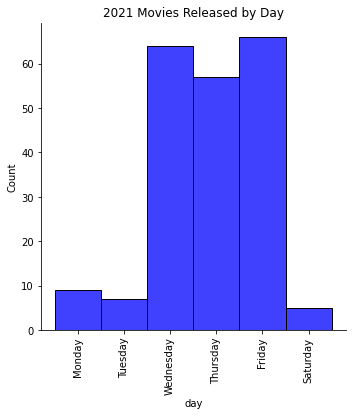

In [70]:
sns.displot(data=df_2021, x='day',  bins=7, color ='blue')
plt.xticks(rotation = 'vertical')
plt.title('2021 Movies Released by Day')
plt.savefig('2021moviereleasedbyday.png')

 **Which movie has received the highest votes in Year 2021?**

In [71]:
df_2021['Votes'].max()

7372

In [72]:
df_2021[df_2021['Votes']==7372]

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category,Decade
id,,,,,,,,,,,,
399566,Godzilla vs. Kong,2021-03-24,"In a time when monsters walk the Earth, humani...",520.159,7.9,7372,False,2021,March,Wednesday,good,2020


**Which Movie has received the least votes in Year 2021?**

In [73]:
df_2021['Votes'].min()

201

In [74]:
new_df[new_df['Votes']==201].head(10)

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category,Decade
id,,,,,,,,,,,,
347688,Scooby-Doo! and Kiss: Rock and Roll Mystery,2015-07-10,Get ready to Rock! Scooby-Doo and the Mystery ...,16.900,8.1,201,False,2015,July,Friday,good,2010
86000,Always,2011-10-20,"Cheol-Min, a man with a dark, picks up a part-...",8.089,7.8,201,False,2011,October,Thursday,good,2010
247645,Queen,2013-09-27,"Rani, a 24-year-old homely girl, decides to go...",6.701,7.4,201,False,2013,September,Friday,good,2010
12554,Citizen X,1996-04-27,Based on the true story of a Russian serial ki...,12.183,7.3,201,False,1996,April,Saturday,good,1990
487491,"Fala Sério, Mãe!",2017-12-28,"Ângela Cristina, mother of teenager Maria de L...",5.980,7.3,201,False,2017,December,Thursday,good,2010
98622,9,2005-04-21,A rag doll fights a monster that has been stea...,8.849,7.1,201,False,2005,April,Thursday,good,2000
461615,MFKZ,2018-05-23,Angelino is just one of thousands of deadbeats...,8.252,7.1,201,False,2018,May,Wednesday,good,2010
17358,My Name Ain't Johnny,2008-01-04,"The true story of João Guilherme Estrella (""Jo...",6.551,7.1,201,False,2008,January,Friday,good,2000
336222,Rams,2015-05-28,"In a secluded valley in Iceland, Gummi and Kid...",6.009,7.1,201,False,2015,May,Thursday,good,2010


Top 10 Popularity Movies and Ratings in Year 2021

In [75]:
Popular_movies_2021 = df_2021[['Movie', 'Popularity', 'Year']]
Popular_movies_2021 = df_2021.sort_values('Popularity',ascending= False).head(10)
Popular_movies_2021

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Month,day,Rating_category,Decade
id,,,,,,,,,,,,
634649,Spider-Man: No Way Home,2021-12-15,Peter Parker is unmasked and no longer able to...,14136.690,8.5,2654,False,2021,December,Wednesday,good,2020
568124,Encanto,2021-11-24,"The tale of an extraordinary family, the Madri...",8663.277,7.8,1065,False,2021,November,Wednesday,good,2020
624860,The Matrix Resurrections,2021-12-16,"Plagued by strange memories, Neo's life takes ...",7976.130,7.4,1029,False,2021,December,Thursday,good,2020
580489,Venom: Let There Be Carnage,2021-09-30,After finding a host body in investigative rep...,7537.265,7.2,5184,False,2021,September,Thursday,good,2020
460458,Resident Evil: Welcome to Raccoon City,2021-11-24,Once the booming home of pharmaceutical giant ...,4973.769,6.2,456,False,2021,November,Wednesday,average,2020
512195,Red Notice,2021-11-04,An Interpol-issued Red Notice is a global aler...,3644.595,6.8,2294,False,2021,November,Thursday,average,2020
566525,Shang-Chi and the Legend of the Ten Rings,2021-09-01,Shang-Chi must confront the past he thought he...,2967.672,7.8,4608,False,2021,September,Wednesday,good,2020
585245,Clifford the Big Red Dog,2021-11-10,As Emily struggles to fit in at home and at sc...,2311.807,7.4,712,False,2021,November,Wednesday,good,2020
524434,Eternals,2021-11-03,The Eternals are a team of ancient aliens who ...,1986.809,7.1,1526,False,2021,November,Wednesday,good,2020


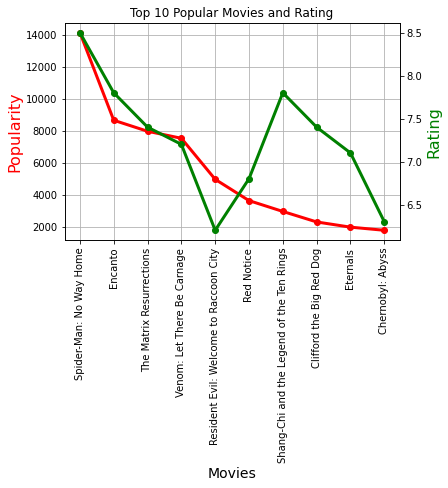

In [76]:
col1='red'
col2 = 'green'
fig,ax = plt.subplots()
ax.plot(Popular_movies_2021.Movie,Popular_movies_2021.Popularity,color = col1, marker='o', linewidth =3)
ax.set_xlabel('Movies', fontsize = 14)
plt.title('Top 10 Popular Movies and Rating')
plt.xticks(rotation = 'vertical')
plt.grid()
ax.set_ylabel('Popularity', color=col1, fontsize =16)
ax2 = ax.twinx()

ax2.plot(Popular_movies_2021.Movie, Popular_movies_2021.Rating, color=col2, marker='o',linewidth =3)
ax2.set_ylabel('Rating', color=col2, fontsize=16)

plt.savefig('2021toppopularmoviesandratings.png')

In [77]:
df_2021.describe()

,Popularity,Rating,Votes,Year,Decade
count,208.000000,208.000000,208.000000,208.0,208.0
mean,499.266764,7.085577,1070.514423,2021.0,2020.0
std,1440.228792,0.744567,1359.167325,0.0,0.0
min,8.337000,4.300000,201.000000,2021.0,2020.0
25%,66.246750,6.600000,311.000000,2021.0,2020.0
50%,147.989500,7.100000,525.500000,2021.0,2020.0
75%,347.558250,7.700000,1066.750000,2021.0,2020.0
max,14136.690000,8.600000,7372.000000,2021.0,2020.0


# Conclusion: This analysis is from the data file name 'movie' from Kaggle. It has a movie record from 1902 to 2021, and has highgest ratings of 8.7 and lowest 2.2. This analysis will focus on decade, year, month and day of movies released. I have categories the movie rating (greater than 7 ='good', between 6 to 7='average',below 6='bad'). It will focus on top 10 movies regarding ratings, popularity and votes. Also, i have analysis on latest year 2015 to 2021, 2021 and Year 2017(because it has the highest released of movies).
